# Prepare the dataset to sociodemographic

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler

import util

## Loading data

In [3]:
df_base_original = pd.read_csv('data/output/df_dataset.csv', index_col=0)

## Treating missing data
Missing data for five municipalities founded after 2010. We removed these municipalities from the dataset and also the municipalities that ones was part.

Municípios de origem:

    Mojuí dos Campos (PA): Emancipado em 2013 do município de Moju (https://en.wikipedia.org/wiki/Moju%C3%AD_dos_Campos).
    Pescaria Brava (SC): Desmembrado de Imbituba em 2013 (https://en.wikipedia.org/wiki/Pescaria_Brava).
    Balneário Rincão (SC): Separado de Içara também em 2013 (https://pt.wikipedia.org/wiki/Balne%C3%A1rio_Rinc%C3%A3o).
    Pinto Bandeira (RS): Originário do município de Carlos Barbosa, emancipado em 2013 (https://en.wikipedia.org/wiki/Pinto_Bandeira).
    Paraíso das Águas (MS): Desmembrado de Mundo Novo em 2013 (https://pt.wikipedia.org/wiki/Para%C3%ADso_das_%C3%81guas).

In [4]:
municipalities_to_remove = df_base_original[df_base_original.isna().any(axis=1)]['municipality'].values
municipalities_to_remove = np.append(municipalities_to_remove, ['Moju (PA)', 'Imbituba (SC)', 'Içara (SC)', 'Carlos Barbosa (RS)', 'Mundo Novo (MS)'])

In [5]:
df_base_original[df_base_original.municipality.isin(municipalities_to_remove)]

,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
223,1504703,Moju (PA),83039,-1.885889,-48.767199,38.288033,34.189959,20.638495,8.154000,35.936473,...,37.75,5.74,72.39,3.08,53.16,12.34,19.55,8.05,12.47,7.26
224,1504752,Mojuí dos Campos (PA),23501,NaN,NaN,34.232586,30.275307,23.394749,12.097358,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.82,NaN
4419,4207007,Içara (SC),59035,-28.707084,-49.300823,26.113323,32.291014,27.107648,14.488016,91.637346,...,22.27,4.22,30.21,0.10,10.96,17.74,29.62,25.48,2.61,10.11
4422,4207304,Imbituba (SC),52581,-28.239951,-48.669284,23.993458,29.366121,27.740058,18.896560,100.000000,...,24.57,5.51,36.82,0.10,7.75,17.75,46.15,8.16,3.23,10.80
4503,4212650,Pescaria Brava (SC),10190,NaN,NaN,23.954858,28.930324,28.459274,18.655545,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,NaN
4605,4220000,Balneário Rincão (SC),15981,NaN,NaN,26.055941,26.450160,25.786872,21.707027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.44,NaN
4696,4304804,Carlos Barbosa (RS),30418,-29.298297,-51.503818,21.819318,31.162470,28.351634,18.673154,79.358527,...,22.22,2.50,27.58,0.00,14.15,10.45,27.95,36.02,1.89,10.97
4923,4314548,Pinto Bandeira (RS),2723,NaN,NaN,19.500551,25.119354,26.257804,29.122292,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.37,NaN
5154,5005681,Mundo Novo (MS),19193,-23.935274,-54.281661,28.400980,28.812588,26.290835,16.495597,89.602769,...,22.19,9.51,52.80,0.31,15.51,16.10,41.64,13.83,8.77,9.42
5160,5006275,Paraíso das Águas (MS),5510,NaN,NaN,30.998185,30.471869,26.061706,12.468240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.19,NaN


In [6]:
population_to_remove = df_base_original[df_base_original.municipality.isin(municipalities_to_remove)]['population'].sum()
population_to_remove

302171

In [7]:
population_to_remove / df_base_original['population'].sum() * 100

0.1488068856352964

In [8]:
df_base_original = df_base_original.loc[df_base_original['municipality'].isin(municipalities_to_remove) == False]

In [9]:
df_base_original

,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,1100015,Alta Floresta D'Oeste (RO),21495,-11.935540,-61.999824,29.276576,29.309142,26.871365,14.538265,57.272876,...,34.73,6.07,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67
1,1100023,Ariquemes (RO),96833,-9.908463,-63.033269,29.736763,33.135398,25.601809,11.526029,84.695583,...,27.66,5.11,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18
2,1100031,Cabixi (RO),5363,-13.499763,-60.544314,27.428678,24.855491,28.305053,19.187022,42.658007,...,32.98,2.90,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09
3,1100049,Cacoal (RO),86895,-11.433865,-61.442944,27.389378,33.099718,26.171817,13.329881,78.805966,...,24.97,6.28,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74
4,1100056,Cerejeiras (RO),15890,-13.195033,-60.818426,28.445563,30.780365,26.085588,14.688483,84.673205,...,28.46,5.72,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),14956,-16.742081,-48.513471,27.360257,29.459749,28.450120,14.729874,73.079375,...,26.44,4.03,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11
5566,5222054,Vicentinópolis (GO),8768,-17.732662,-49.807239,28.592609,32.744069,26.881843,11.781478,85.754986,...,17.41,6.23,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07
5567,5222203,Vila Boa (GO),4215,-15.034889,-47.057361,33.618031,29.822064,24.578885,11.981020,73.959873,...,13.70,8.93,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49
5568,5222302,Vila Propício (GO),5815,-15.454635,-48.882422,28.323302,26.672399,29.062769,15.941531,29.232264,...,23.59,4.46,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46


## Transformed datasets

In [10]:
df_features_only = df_base_original.drop(columns=df_base_original.columns[:5])

#### Standardized dataset

In [11]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(df_features_only)
df_standardized = pd.DataFrame(features_standardized, columns=df_features_only.columns, index=df_features_only.index)

#### Transforming features

In [12]:
df_transformed_features = df_features_only.copy()

In [13]:
df_transformed_features['log_demographic_density'] = np.log(df_transformed_features['demographic_density'])
df_transformed_features['sqrt_percentage_indigenous_population'] = np.sqrt(df_transformed_features['percentage_indigenous_population'])
df_transformed_features['log_per_capita_income'] = np.log(df_transformed_features['per_capita_income'])
df_transformed_features['log_per_capita_cash_transfer_program'] = np.log(df_transformed_features['per_capita_cash_transfer_program'])
df_transformed_features['sqrt_percentage_estimated_households_in_informal_settlements'] = np.sqrt(df_transformed_features['percentage_estimated_households_in_informal_settlements'])
df_transformed_features['sqrt_percentage_population_in_informal_settlements'] = np.sqrt(df_transformed_features['percentage_population_in_informal_settlements'])
df_transformed_features['sqrt_demographic_density_in_informal_settlements'] = np.sqrt(df_transformed_features['demographic_density_in_informal_settlements'])
df_transformed_features['sqrt_percentage_population_in_households_without_bathroom'] = np.sqrt(df_transformed_features['percentage_population_in_households_without_bathroom'])
df_transformed_features['sqrt_percentage_hospitalizations_diseases_inadequate_sanitation'] = np.sqrt(df_transformed_features['percentage_hospitalizations_diseases_inadequate_sanitation'])
df_transformed_features['sqrt_percentage_poor_population_spending_more_1_hour_to_work'] = np.sqrt(df_transformed_features['percentage_poor_population_spending_more_1_hour_to_work'])
df_transformed_features['sqrt_illiteracy_rate'] = np.sqrt(df_transformed_features['illiteracy_rate'])

In [14]:
df_transformed_features = df_transformed_features.drop(columns=['demographic_density','per_capita_income','per_capita_cash_transfer_program', 'percentage_indigenous_population', 'percentage_estimated_households_in_informal_settlements','percentage_population_in_informal_settlements', 'demographic_density_in_informal_settlements', 'percentage_population_in_households_without_bathroom', 'percentage_hospitalizations_diseases_inadequate_sanitation','percentage_poor_population_spending_more_1_hour_to_work','illiteracy_rate'])

### Min-max normalized dataset

In [15]:
scaler = MinMaxScaler()
# Fit and transform the data
df_normalized_min_max = pd.DataFrame(scaler.fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### L2 normalized dataset

In [16]:
df_normalized_l2 = pd.DataFrame(preprocessing.Normalizer().fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### L1 normalized dataset

In [17]:
df_normalized_l1 = pd.DataFrame(preprocessing.Normalizer(norm='l1').fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

### Max normalized dataset

In [18]:
df_normalized_max = pd.DataFrame(preprocessing.Normalizer(norm='max').fit_transform(df_transformed_features), columns=df_transformed_features.columns, index=df_transformed_features.index)

## Treating collinearity

### Util

In [19]:
def plot_spearman(df):
    palette = util.get_default_colors_heatmap()
    attributes = df.columns[:]
    n = len(attributes)
    yticks = [f"{i + 1} - {attr}" for i, attr in enumerate(attributes)]
    xticks = list(range(1, n + 1))
    df_selected_attributes = df[attributes]
    correlation, pvalue = spearmanr(df_selected_attributes)
    pvalue = np.round(pvalue, 2)
    
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    largura = 70
    altura = 50
    
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    
    f, ax = plt.subplots(figsize=(util.centimeter_to_inch(largura), util.centimeter_to_inch(altura)))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, square=False, mask=mask, cmap=palette,
                     yticklabels=yticks, xticklabels=xticks, annot=correlation,
                     cbar_kws={"orientation": "horizontal"}, cbar=True)
    plt.xticks(rotation=0)
    plt.show()

In [20]:
def plot_pearson(df):
    palette = util.get_default_colors_heatmap()
    # Assuming df_without_collinearity_standardized is your DataFrame
    attributes = df.columns[:]
    n = len(attributes)
    yticks = [f"{i + 1} - {attr}" for i, attr in enumerate(attributes)]
    xticks = list(range(1, n + 1))
    
    # Select the desired attributes
    df_selected_attributes = df[attributes]
    
    # Calculate the Pearson correlation matrix
    correlation = df_selected_attributes.corr()
    
    # Initialize a matrix for p-values
    pvalue = np.zeros((n, n))
    
    # Compute p-values
    for i in range(n):
        for j in range(n):
            if i != j:
                _, pvalue[i, j] = pearsonr(df_selected_attributes.iloc[:, i], df_selected_attributes.iloc[:, j])
            else:
                pvalue[i, j] = np.nan  # NaN for diagonal
    
    # Round p-values to two decimal places
    pvalue = np.round(pvalue, 2)
    
    # Create a mask to hide the upper triangle
    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    # Set plot dimensions
    largura = 70
    altura = 50
    
    # Convert dimensions from centimeters to inches
    def centimeter_to_inch(cm):
        return cm / 2.54
    
    # Set seaborn style
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    
    # Plot the correlation heatmap with annotations for correlation values
    f, ax = plt.subplots(figsize=(centimeter_to_inch(largura), centimeter_to_inch(altura)))
    ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, square=False, mask=mask, cmap=palette,
                     yticklabels=yticks, xticklabels=xticks, annot=correlation, fmt=".2f",
                     cbar_kws={"orientation": "horizontal"}, cbar=True)
    plt.xticks(rotation=0)
    plt.show()  

In [21]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

### Original scale

In [103]:
df_without_collinearity_original = df_features_only.copy()

#### First roud analysis

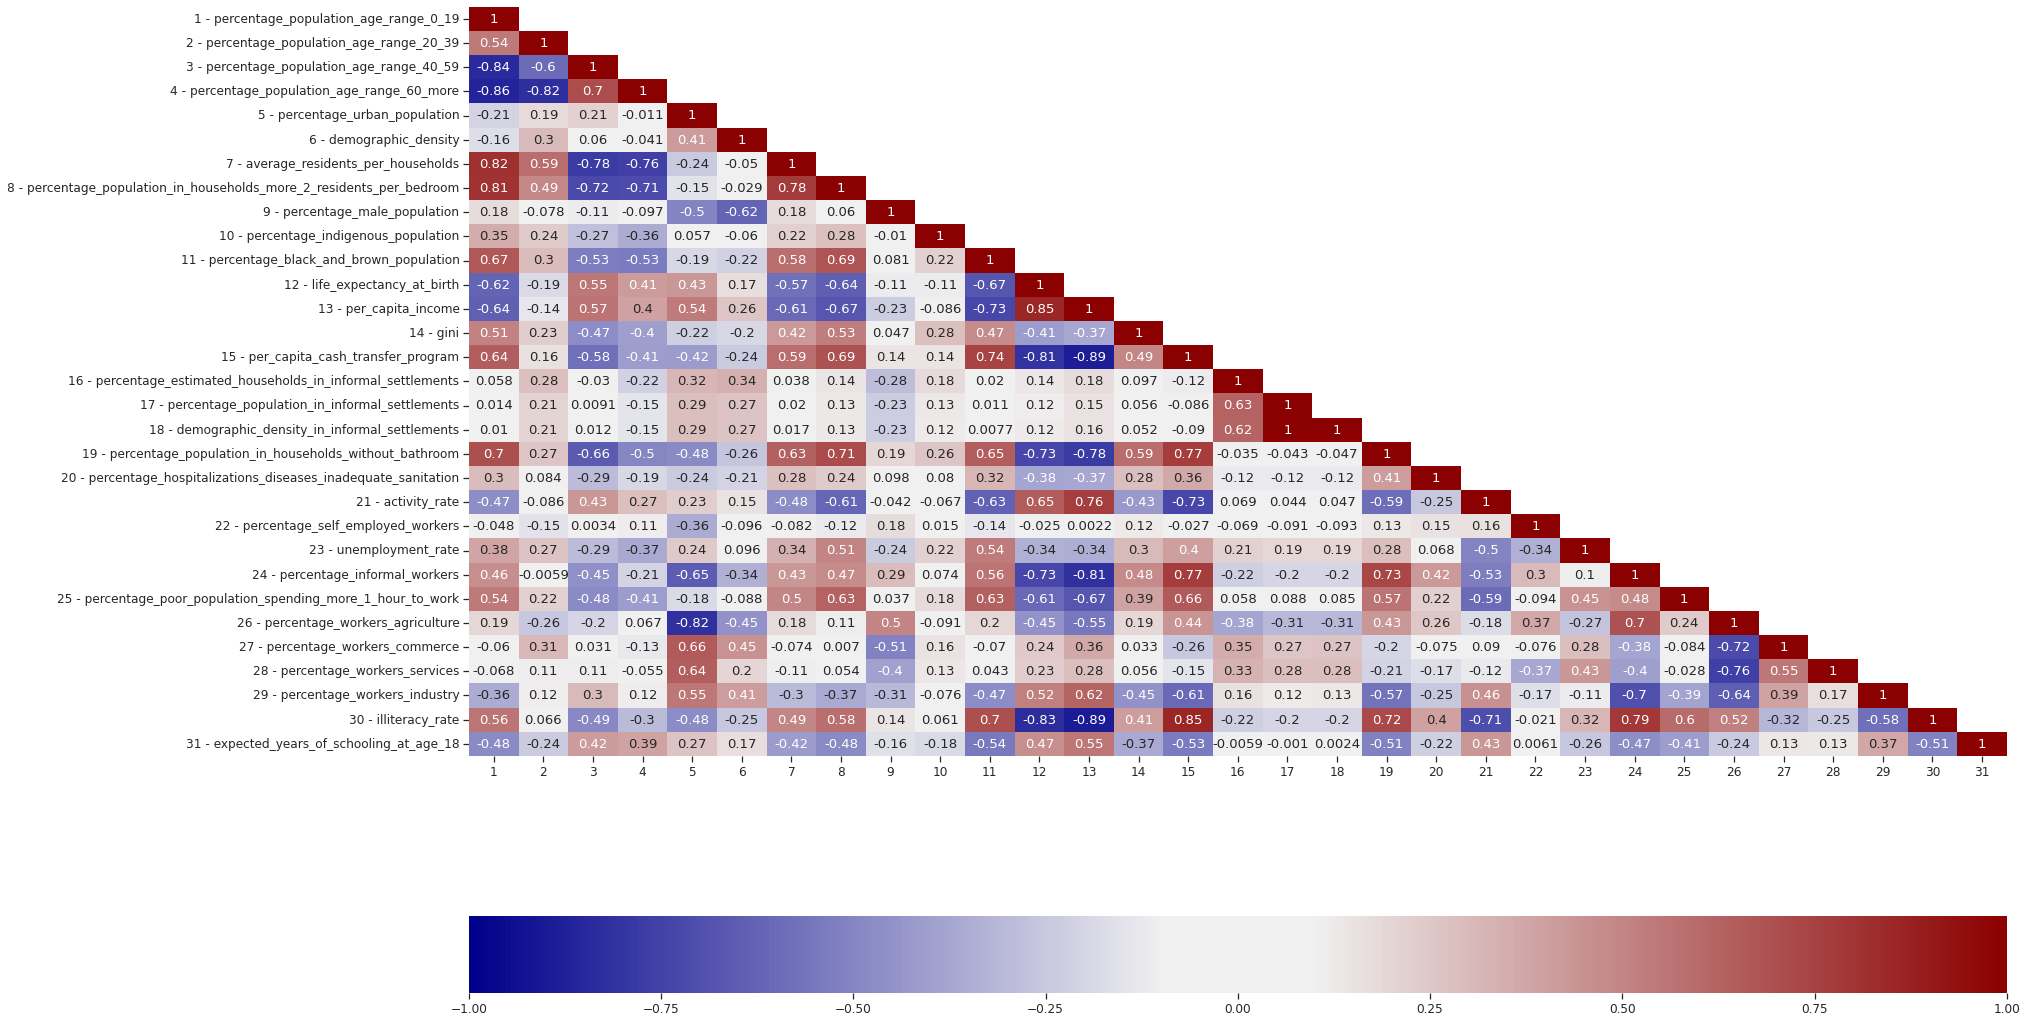

In [43]:
plot_spearman(df_without_collinearity_original)

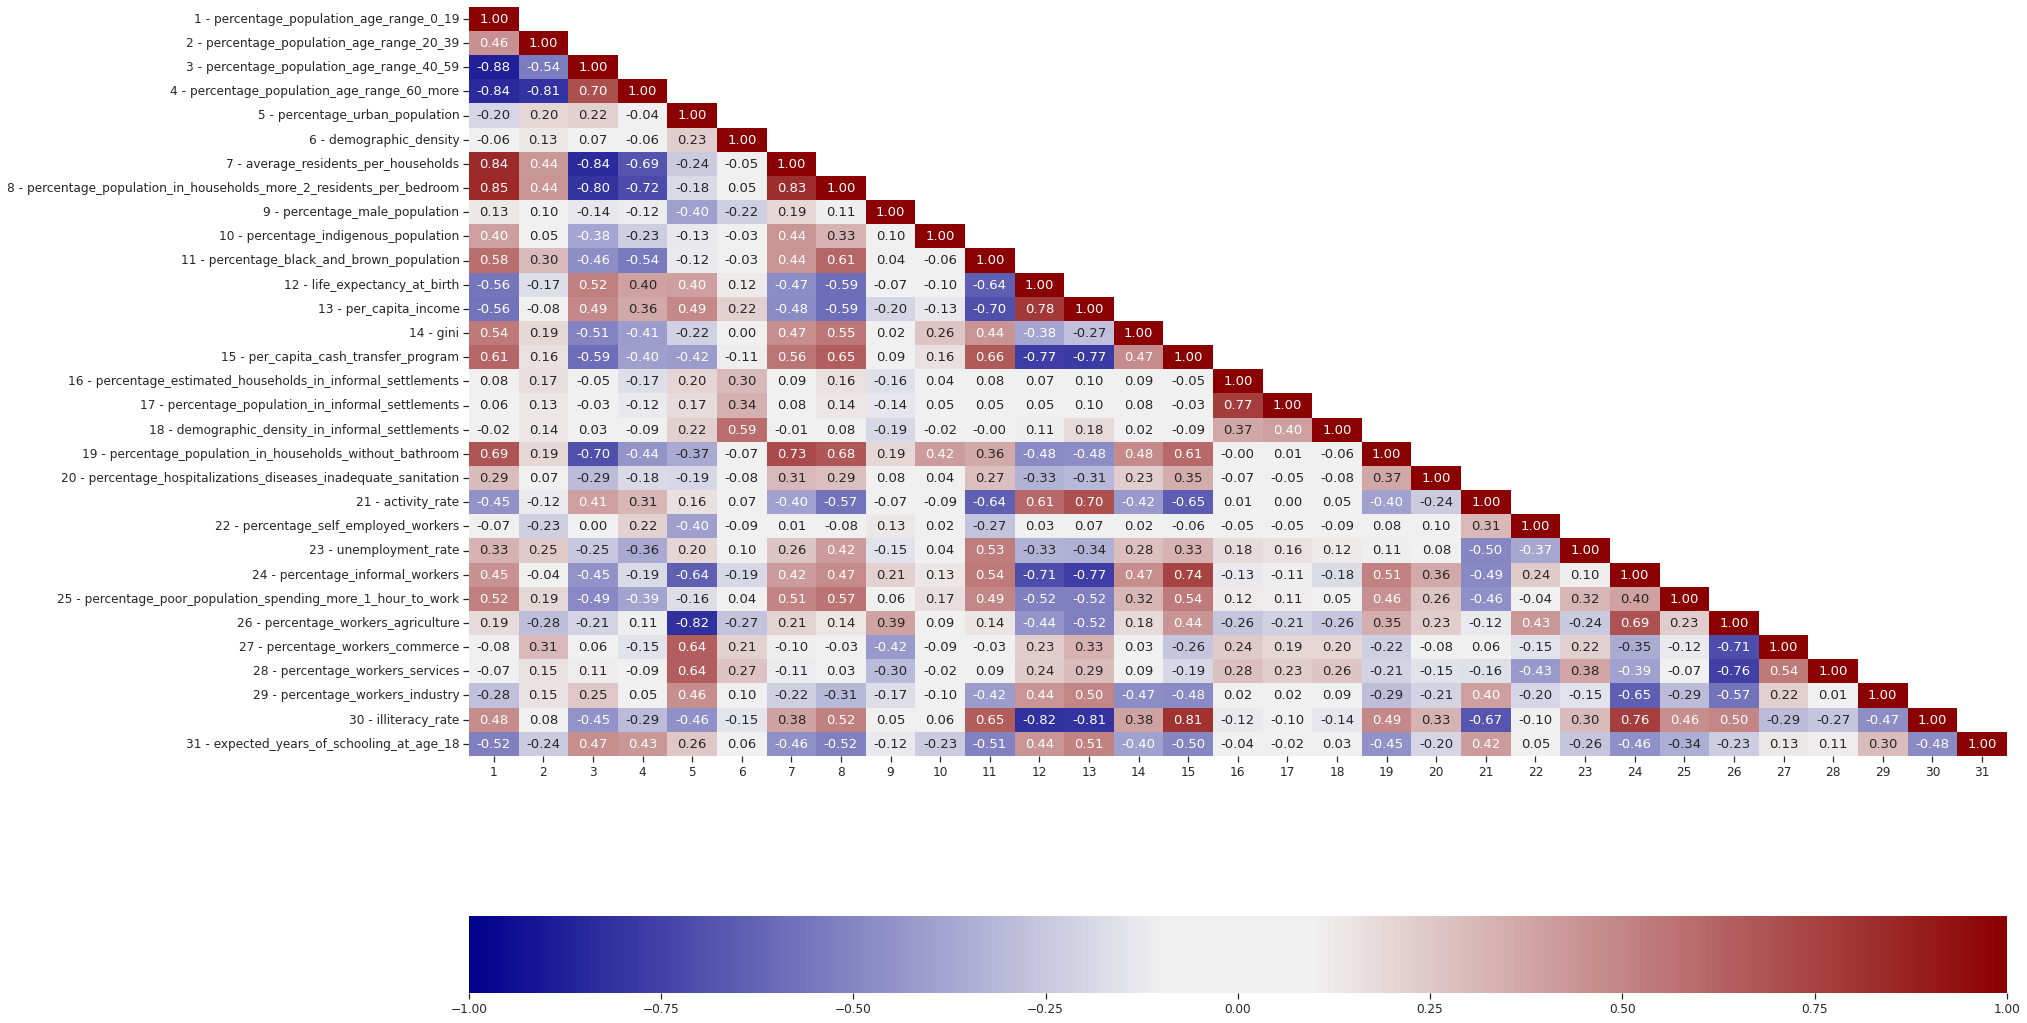

In [33]:
plot_pearson(df_without_collinearity_original)

In [78]:
collinear_attribute_to_remove = ['percentage_population_age_range_0_19', 'percentage_population_age_range_20_39', 'percentage_population_age_range_40_59', 'percentage_workers_agriculture', 'average_residents_per_households', 'percentage_population_in_households_more_2_residents_per_bedroom', 'per_capita_cash_transfer_program', 'percentage_population_in_households_without_bathroom', 'activity_rate', 'percentage_informal_workers', 'illiteracy_rate', 'percentage_black_and_brown_population', 'life_expectancy_at_birth', 'percentage_poor_population_spending_more_1_hour_to_work','percentage_population_in_informal_settlements']

In [45]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_population_age_range_0_19,589.638070
1,percentage_population_age_range_20_39,673.397912
2,percentage_population_age_range_40_59,644.230076
3,percentage_population_age_range_60_more,234.880672
4,percentage_urban_population,35.717701
5,demographic_density,1.764968
6,average_residents_per_households,446.870015
7,percentage_population_in_households_more_2_res...,30.153023
8,percentage_male_population,1682.665676
9,percentage_indigenous_population,1.765308


#### Second round analysis

In [104]:
df_without_collinearity_original = df_without_collinearity_original.drop(columns=collinear_attribute_to_remove)

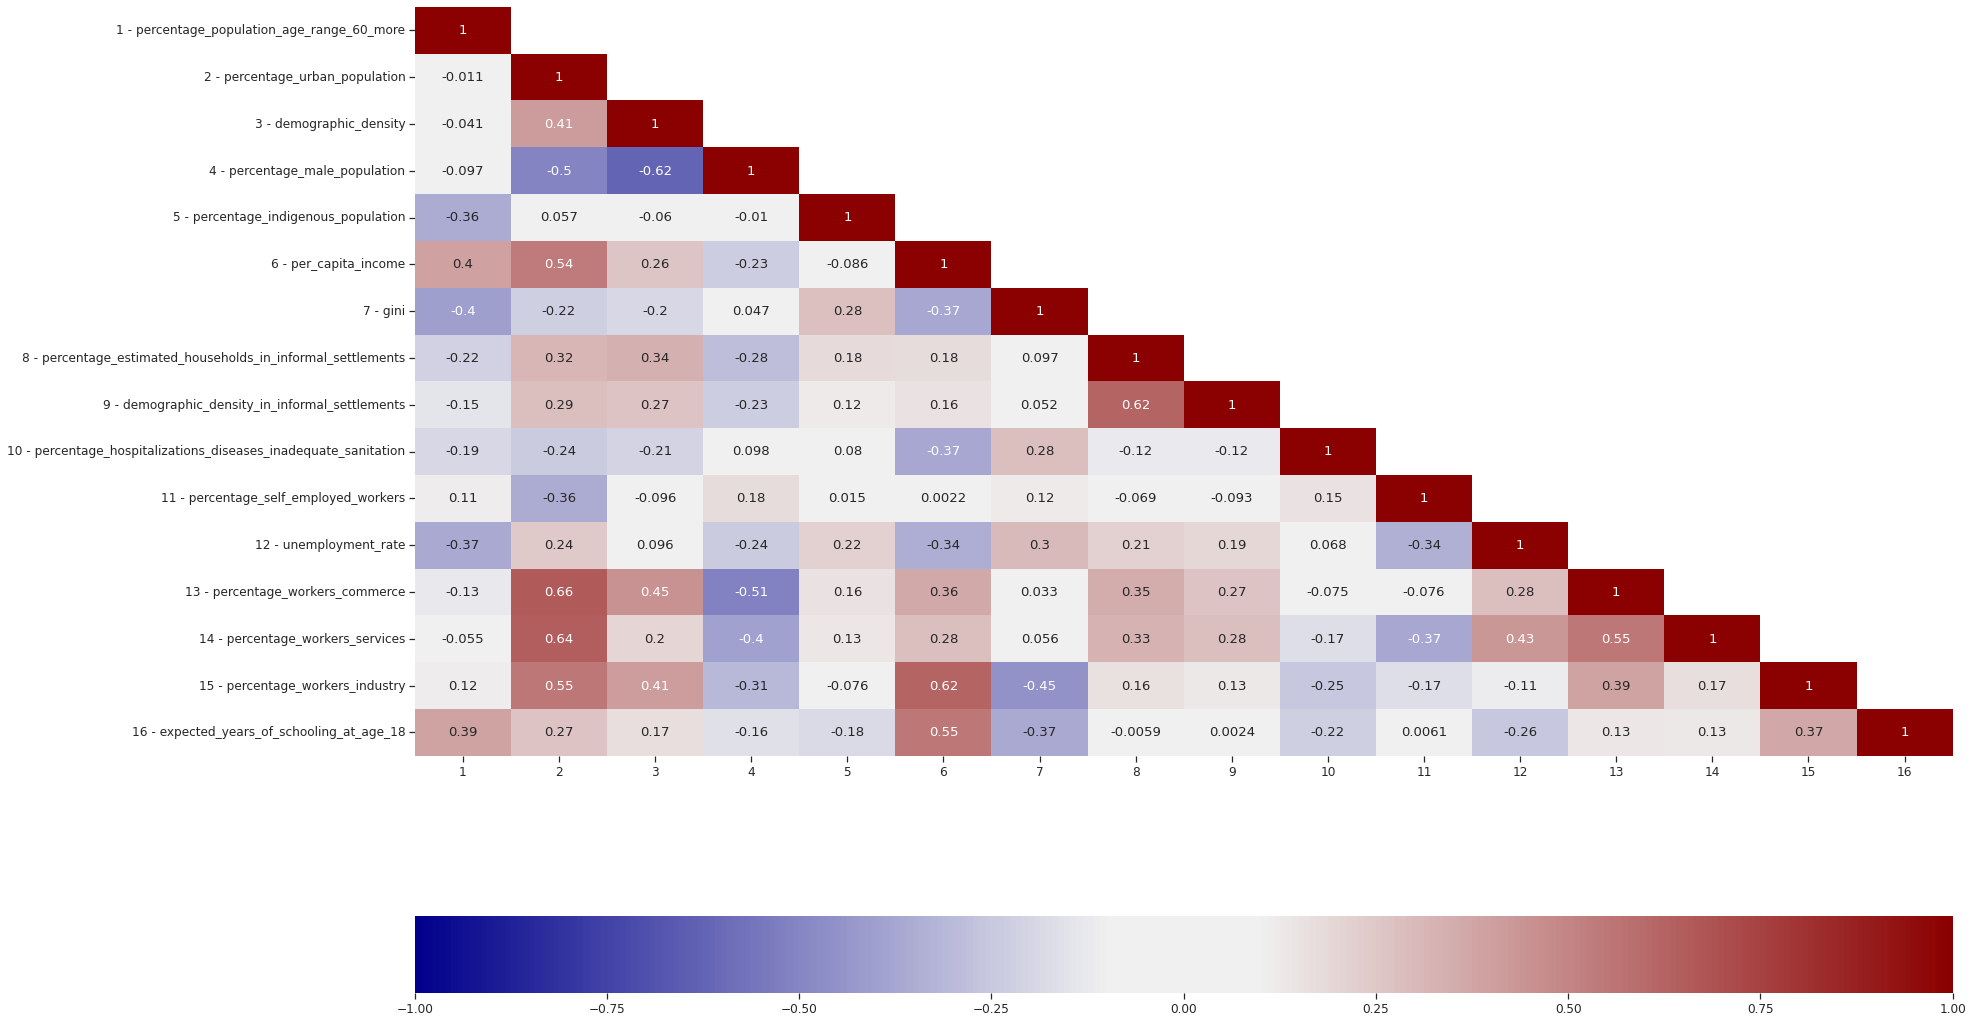

In [47]:
plot_spearman(df_without_collinearity_original)

In [97]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_population_age_range_60_more,25.242733
1,percentage_urban_population,32.030746
2,demographic_density,1.675278
3,percentage_male_population,219.512775
4,percentage_indigenous_population,1.187554
5,per_capita_income,14.716131
6,gini,89.519383
7,percentage_estimated_households_in_informal_se...,1.341310
8,demographic_density_in_informal_settlements,1.716380
9,percentage_hospitalizations_diseases_inadequat...,1.705637


In [98]:
df_without_collinearity_original.describe()

,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,percentage_male_population,percentage_indigenous_population,per_capita_income,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
count,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000
mean,17.426309,63.812480,116.038504,50.001871,1.202797,493.344626,0.494378,1.045418,4.653357,3.160329,24.686198,6.743603,10.571038,32.457595,9.606112,9.463415
std,4.594961,22.035669,596.273211,1.576918,6.144351,242.964075,0.066064,4.512919,26.600689,4.648163,9.852446,3.825917,4.406196,8.888366,8.915897,1.097999
min,4.159697,4.178855,0.150000,45.320000,0.000000,96.250000,0.280000,0.000000,0.000000,0.000000,1.360000,0.000000,0.740000,8.500000,0.000000,4.340000
25%,14.333699,47.072463,11.340000,49.070000,0.028688,281.032500,0.450000,0.000000,0.000000,0.590000,18.080000,4.160000,7.250000,26.127500,3.320000,8.750000
50%,17.262028,64.641604,24.265000,49.890000,0.074338,467.385000,0.490000,0.000000,0.000000,1.470000,22.665000,6.270000,10.045000,31.890000,6.530000,9.470000
75%,20.272381,82.157733,53.495000,50.770000,0.189431,650.367500,0.540000,0.000000,0.000000,3.710000,28.692500,8.620000,13.450000,38.002500,13.287500,10.210000
max,38.914729,100.000000,13416.810000,81.610000,96.596611,2043.740000,0.800000,73.993700,458.863079,58.030000,76.680000,41.930000,36.570000,78.230000,65.110000,12.830000


#### Third round analysis

In [105]:
df_without_collinearity_original = df_without_collinearity_original.drop(columns=['per_capita_income','expected_years_of_schooling_at_age_18','demographic_density','demographic_density_in_informal_settlements','gini'])

In [106]:
df_without_collinearity_original['percentage_male_population'] = df_without_collinearity_original['percentage_male_population'] * 100

In [107]:
calculate_vif(df_without_collinearity_original)

,Feature,VIF
0,percentage_population_age_range_60_more,19.505696
1,percentage_urban_population,30.391949
2,percentage_male_population,55.378038
3,percentage_indigenous_population,1.136079
4,percentage_estimated_households_in_informal_se...,1.206631
5,percentage_hospitalizations_diseases_inadequat...,1.635931
6,percentage_self_employed_workers,11.256102
7,unemployment_rate,5.904552
8,percentage_workers_commerce,13.476770
9,percentage_workers_services,37.075545


### Standardized data
Standardizing data is necessary to treat the collinearity. Without standardizing data the collinearity is significant. We tried with orginal, transformed, and normalized data.

In [45]:
df_without_collinearity_standardized = df_standardized.copy()

#### First round analysis

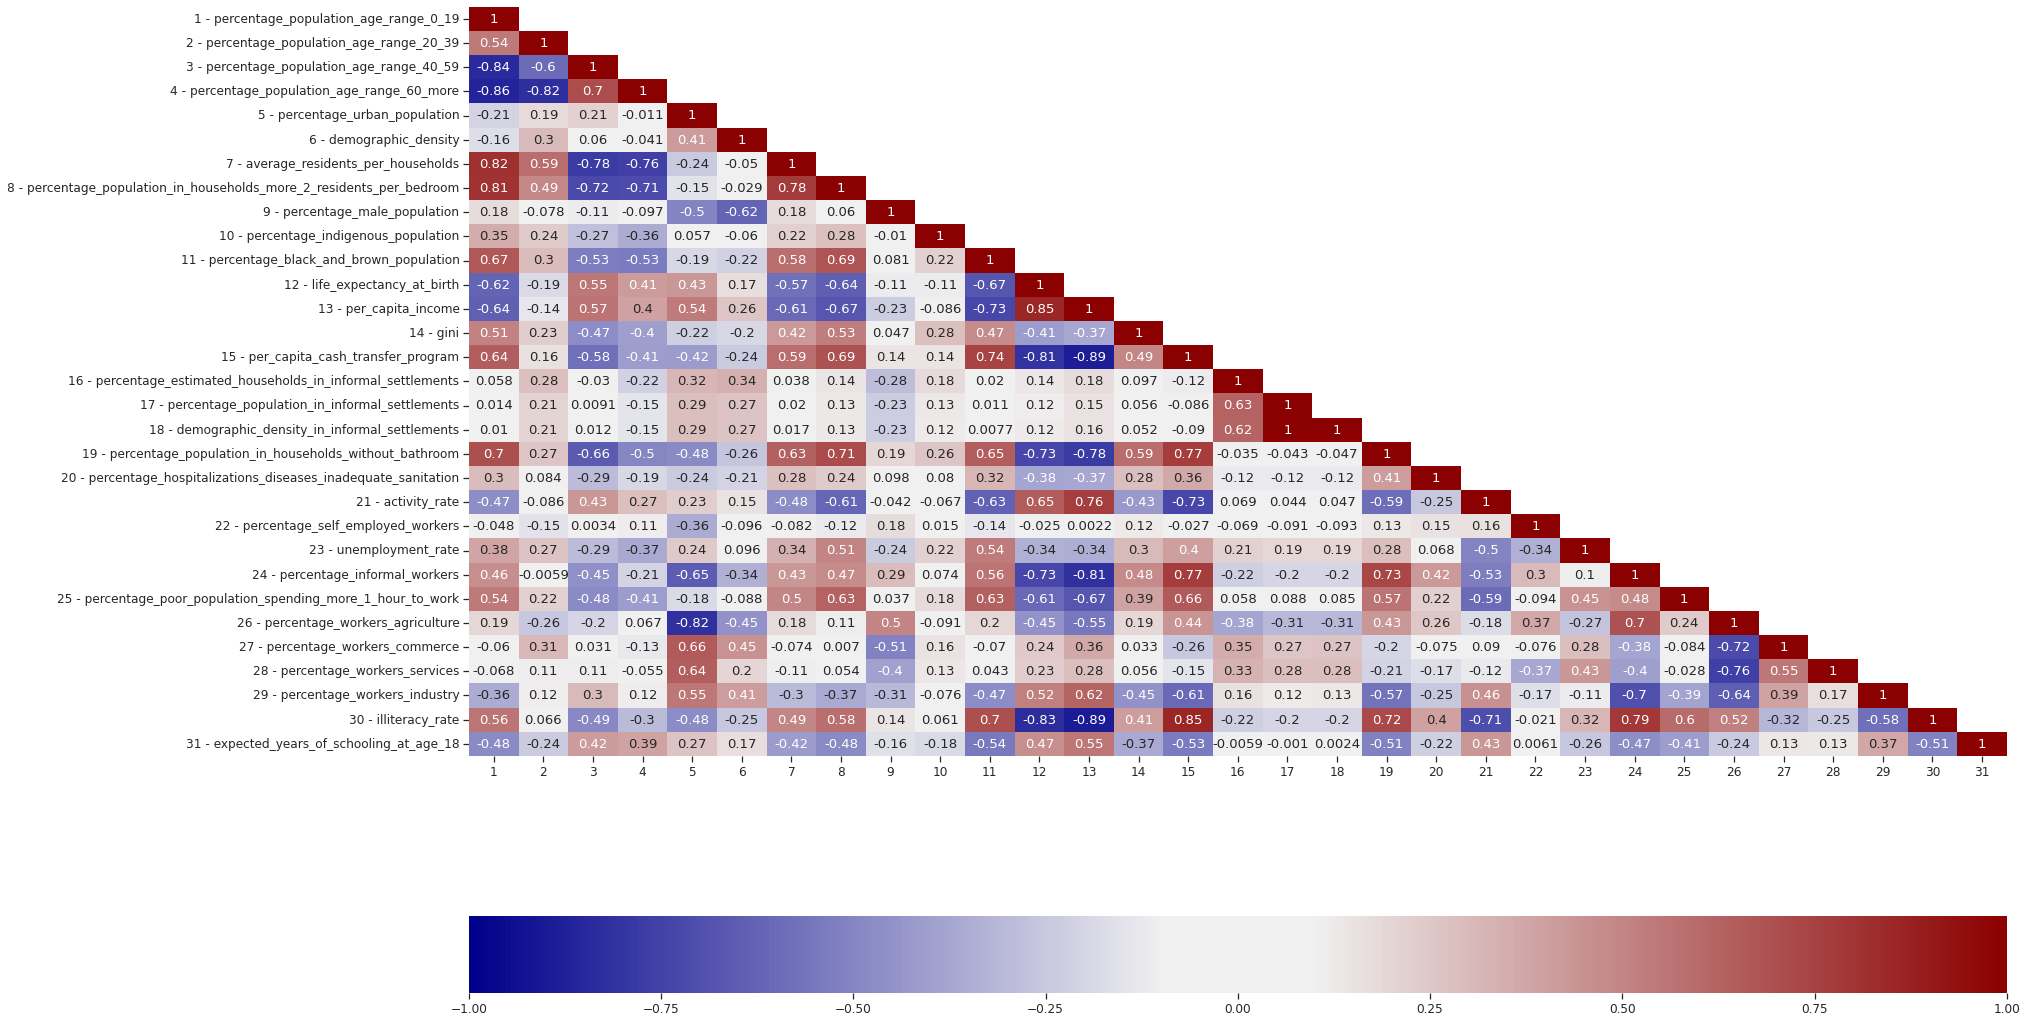

In [46]:
plot_spearman(df_without_collinearity_standardized)

In [47]:
#Threshold |0.7|
collinear_attribute_to_remove = ['percentage_population_age_range_0_19', 'percentage_population_age_range_20_39', 'percentage_population_age_range_40_59', 'percentage_workers_agriculture', 'average_residents_per_households', 'percentage_population_in_households_more_2_residents_per_bedroom', 'per_capita_cash_transfer_program', 'percentage_population_in_households_without_bathroom', 'activity_rate', 'percentage_informal_workers', 'illiteracy_rate', 'percentage_black_and_brown_population', 'life_expectancy_at_birth', 'percentage_poor_population_spending_more_1_hour_to_work']

In [48]:
calculate_vif(df_without_collinearity_standardized)

,Feature,VIF
0,percentage_population_age_range_0_19,124.353866
1,percentage_population_age_range_20_39,44.566984
2,percentage_population_age_range_40_59,39.079931
3,percentage_population_age_range_60_more,110.118285
4,percentage_urban_population,3.818131
5,demographic_density,1.703437
6,average_residents_per_households,5.704440
7,percentage_population_in_households_more_2_res...,6.359080
8,percentage_male_population,1.715537
9,percentage_indigenous_population,1.706372


#### Second round analysis

In [49]:
df_without_collinearity_standardized = df_without_collinearity_standardized.drop(columns=collinear_attribute_to_remove)

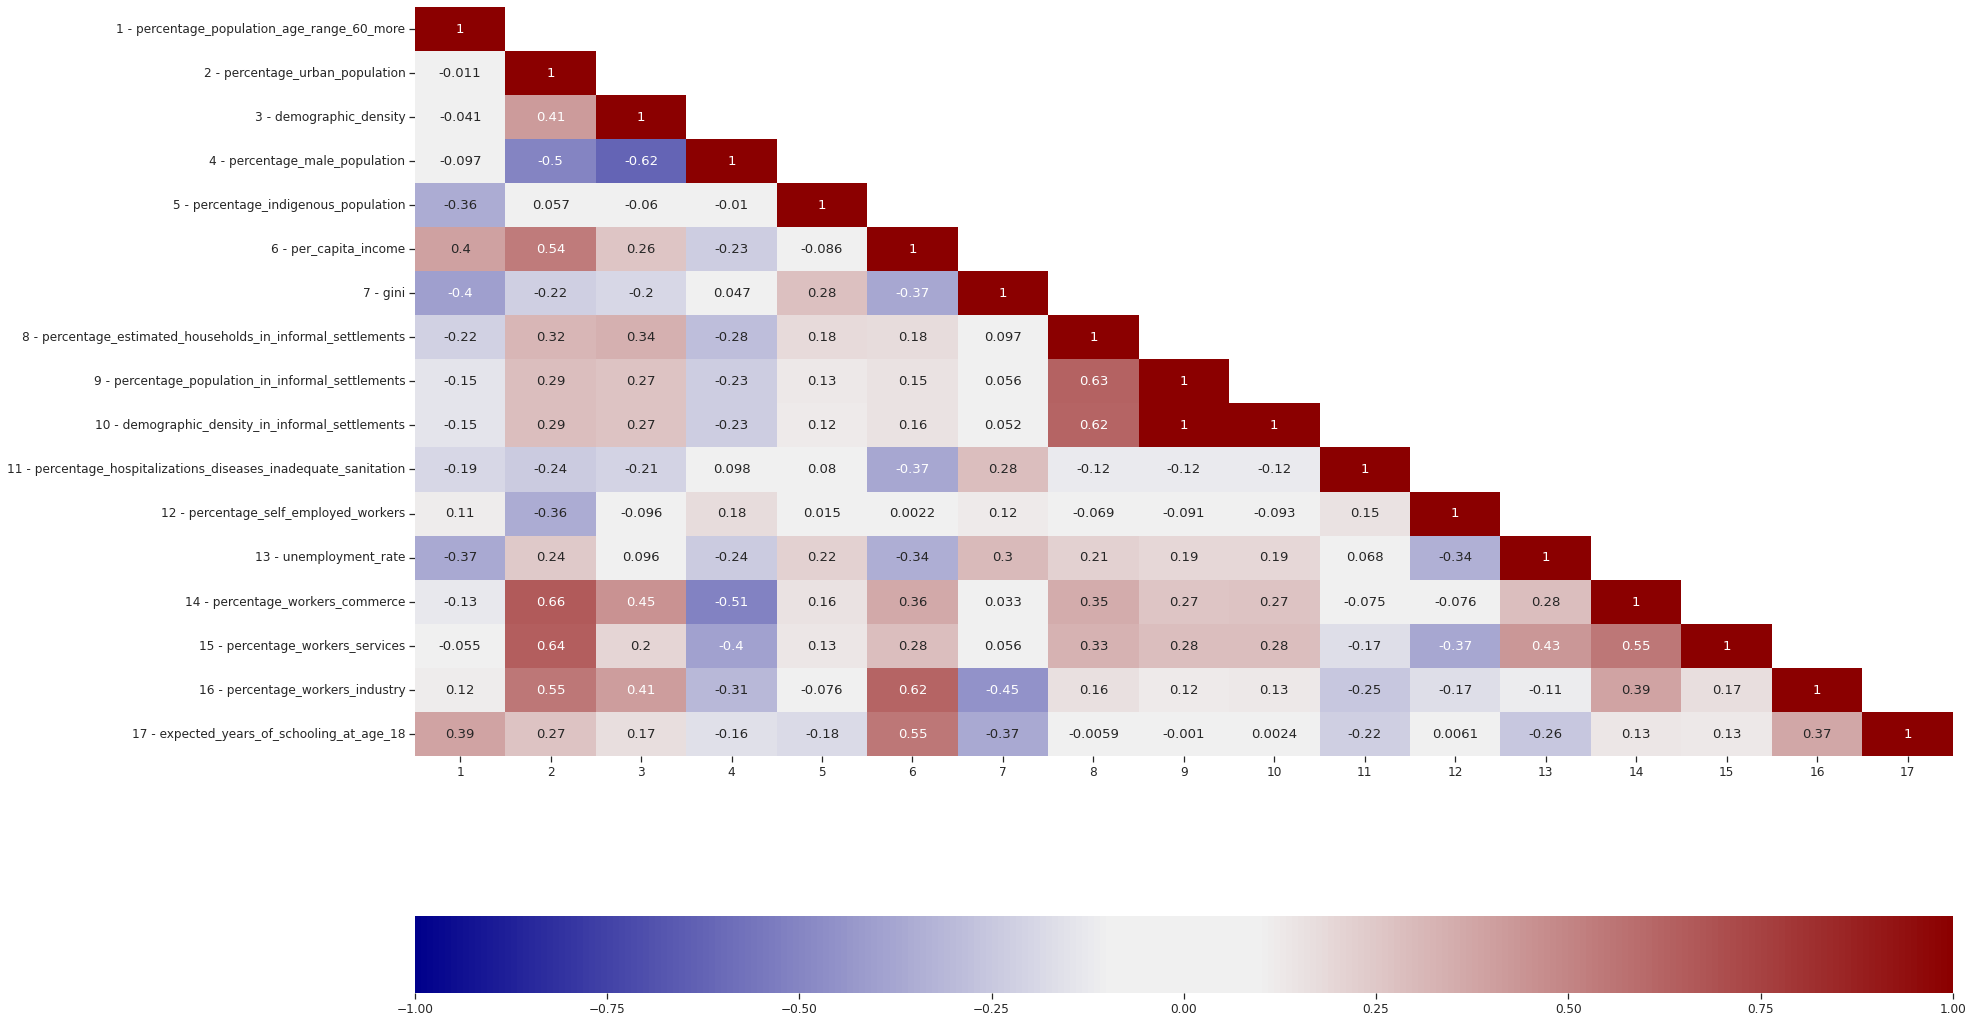

In [50]:
plot_spearman(df_without_collinearity_standardized)

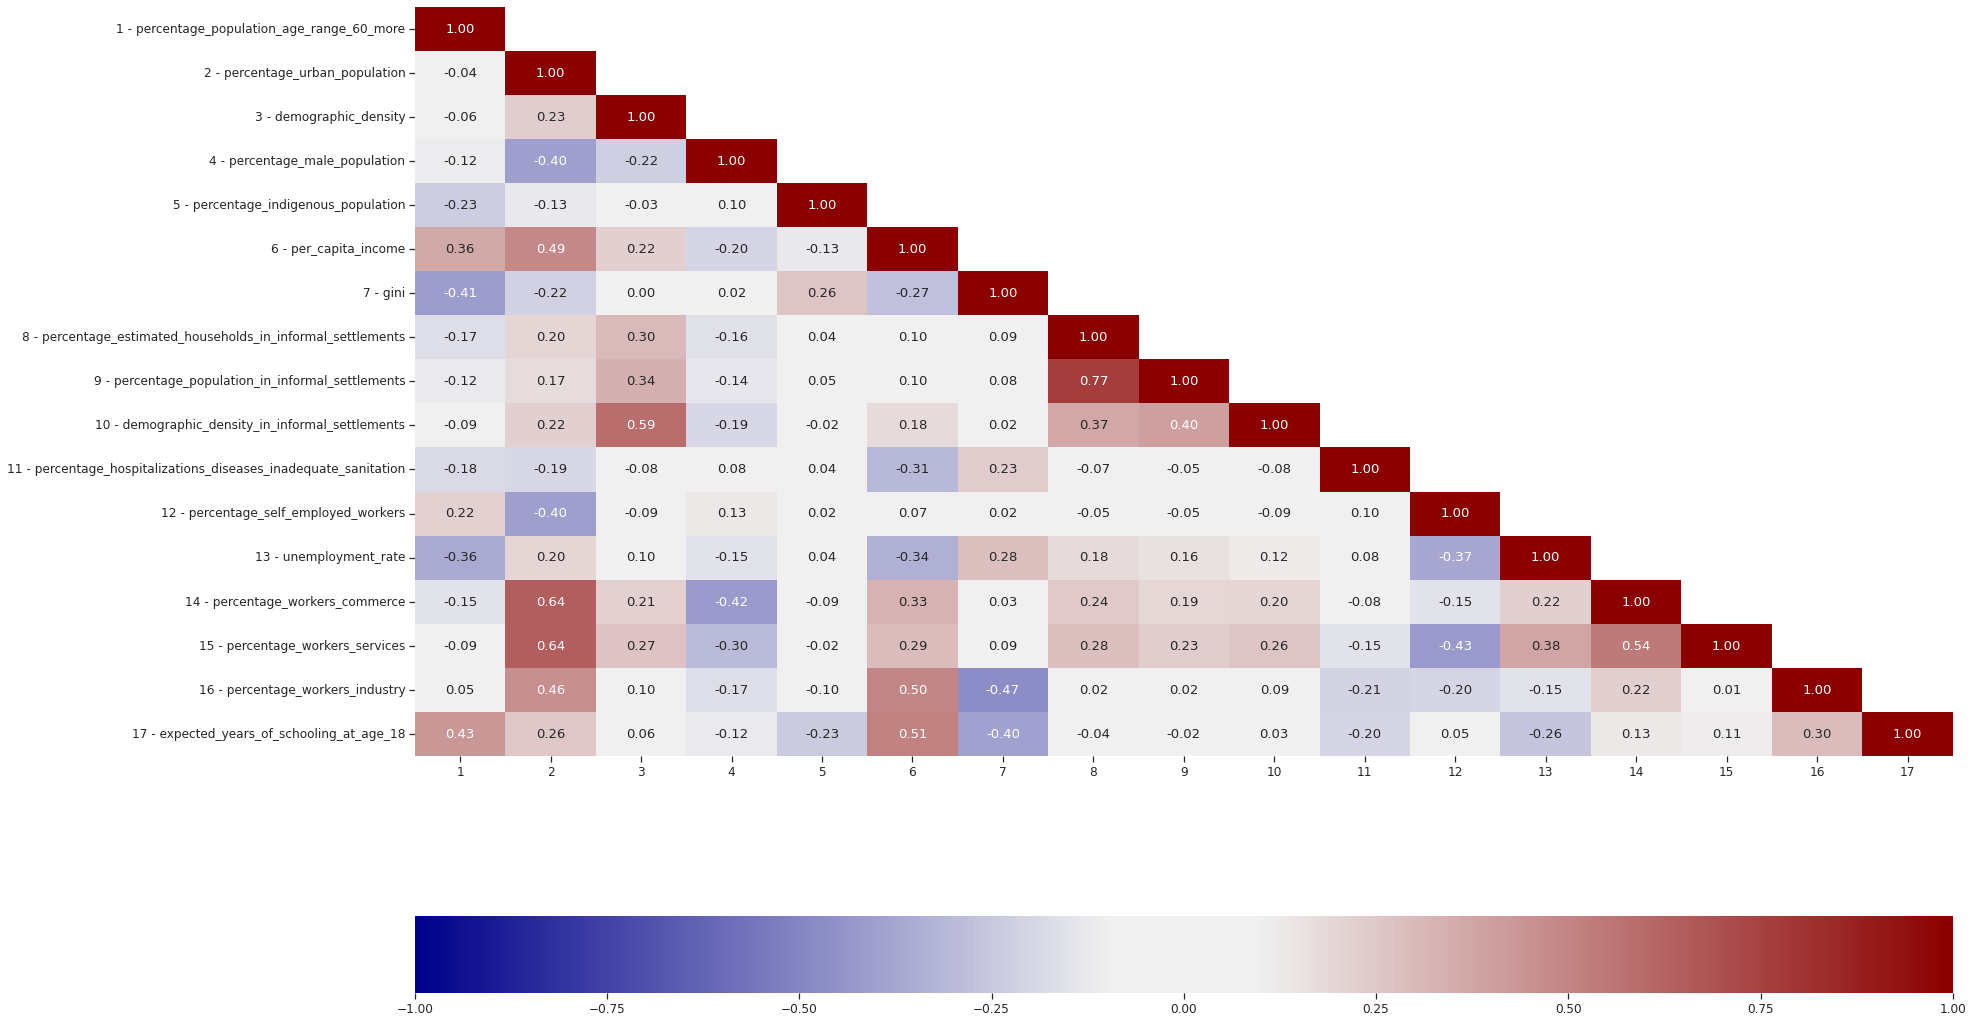

In [51]:
plot_pearson(df_without_collinearity_standardized)

In [52]:
calculate_vif(df_without_collinearity_standardized)

,Feature,VIF
0,percentage_population_age_range_60_more,1.921819
1,percentage_urban_population,3.552318
2,demographic_density,1.641407
3,percentage_male_population,1.396611
4,percentage_indigenous_population,1.145664
5,per_capita_income,3.044738
6,gini,1.882306
7,percentage_estimated_households_in_informal_se...,2.572601
8,percentage_population_in_informal_settlements,2.554667
9,demographic_density_in_informal_settlements,1.691989


In [53]:
collinear_attribute_to_remove = ['percentage_population_in_informal_settlements']

#### Third round analysis

In [54]:
df_without_collinearity_standardized = df_without_collinearity_standardized.drop(columns=collinear_attribute_to_remove)

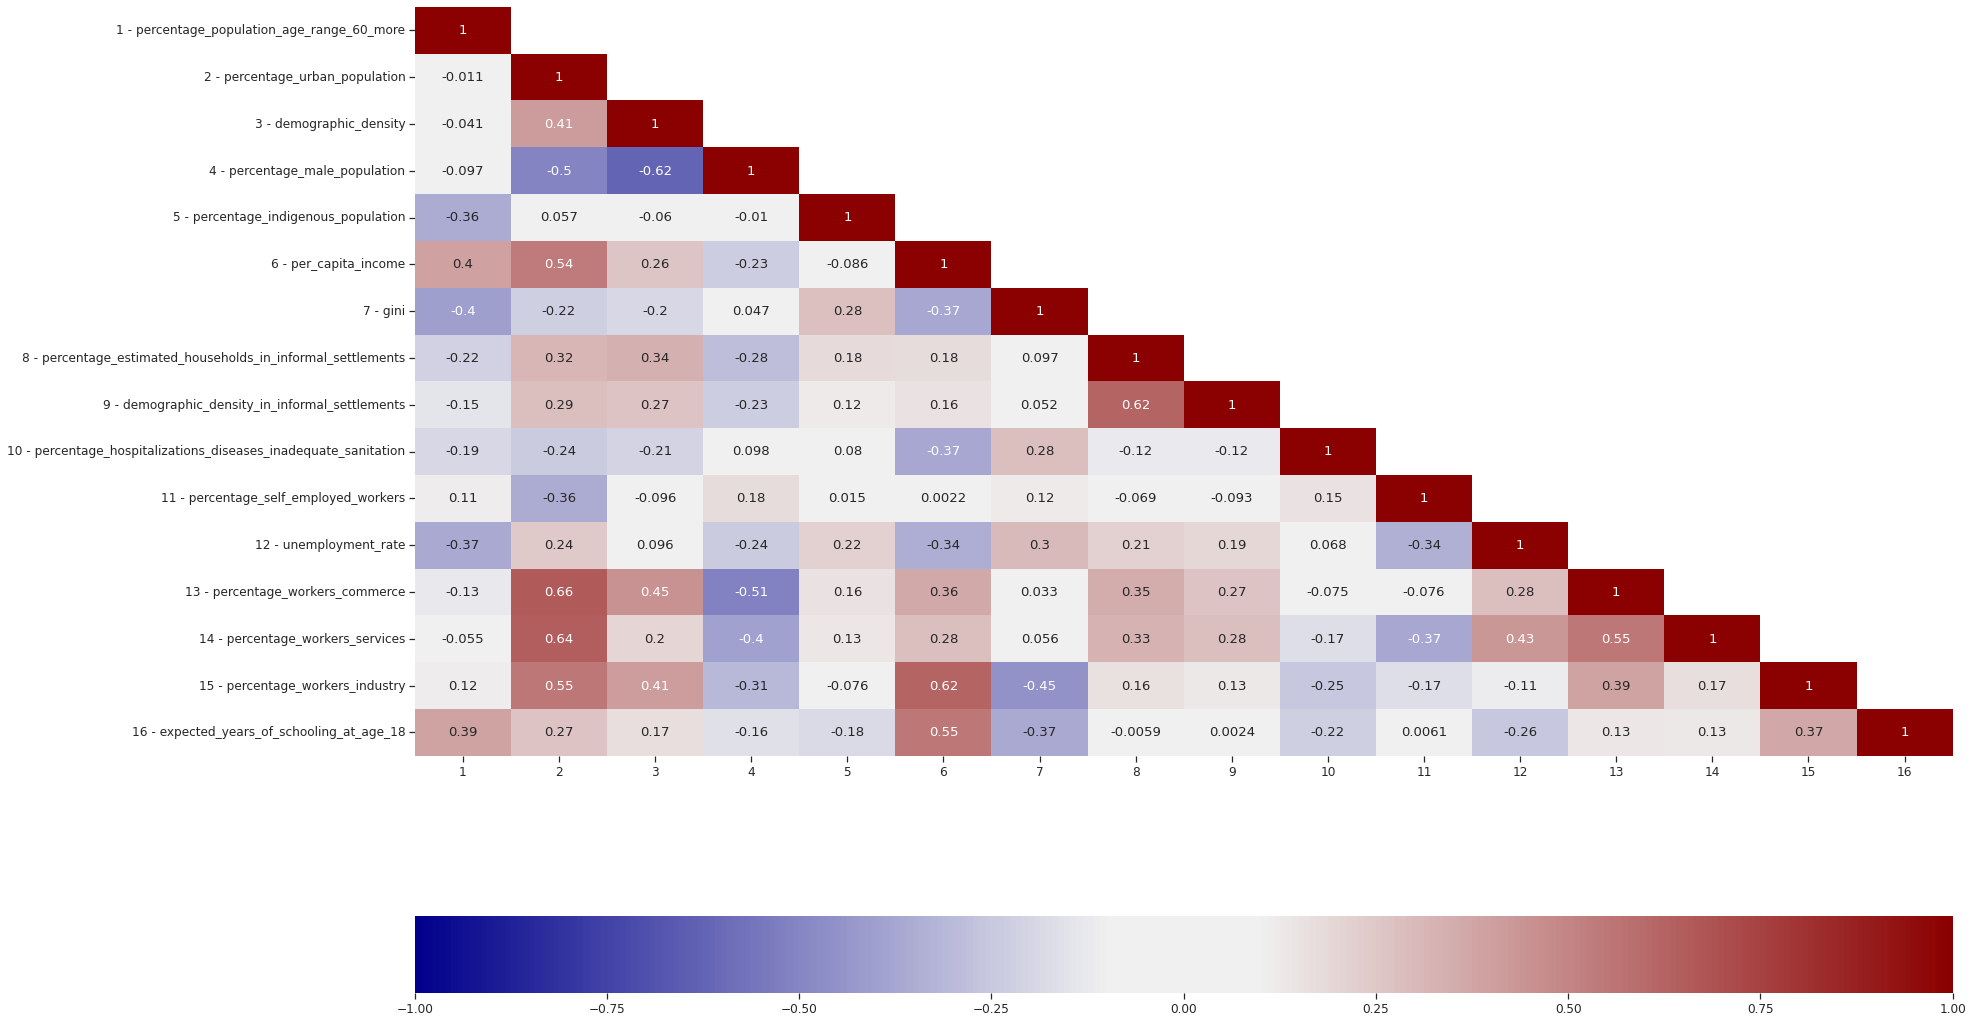

In [55]:
plot_spearman(df_without_collinearity_standardized)

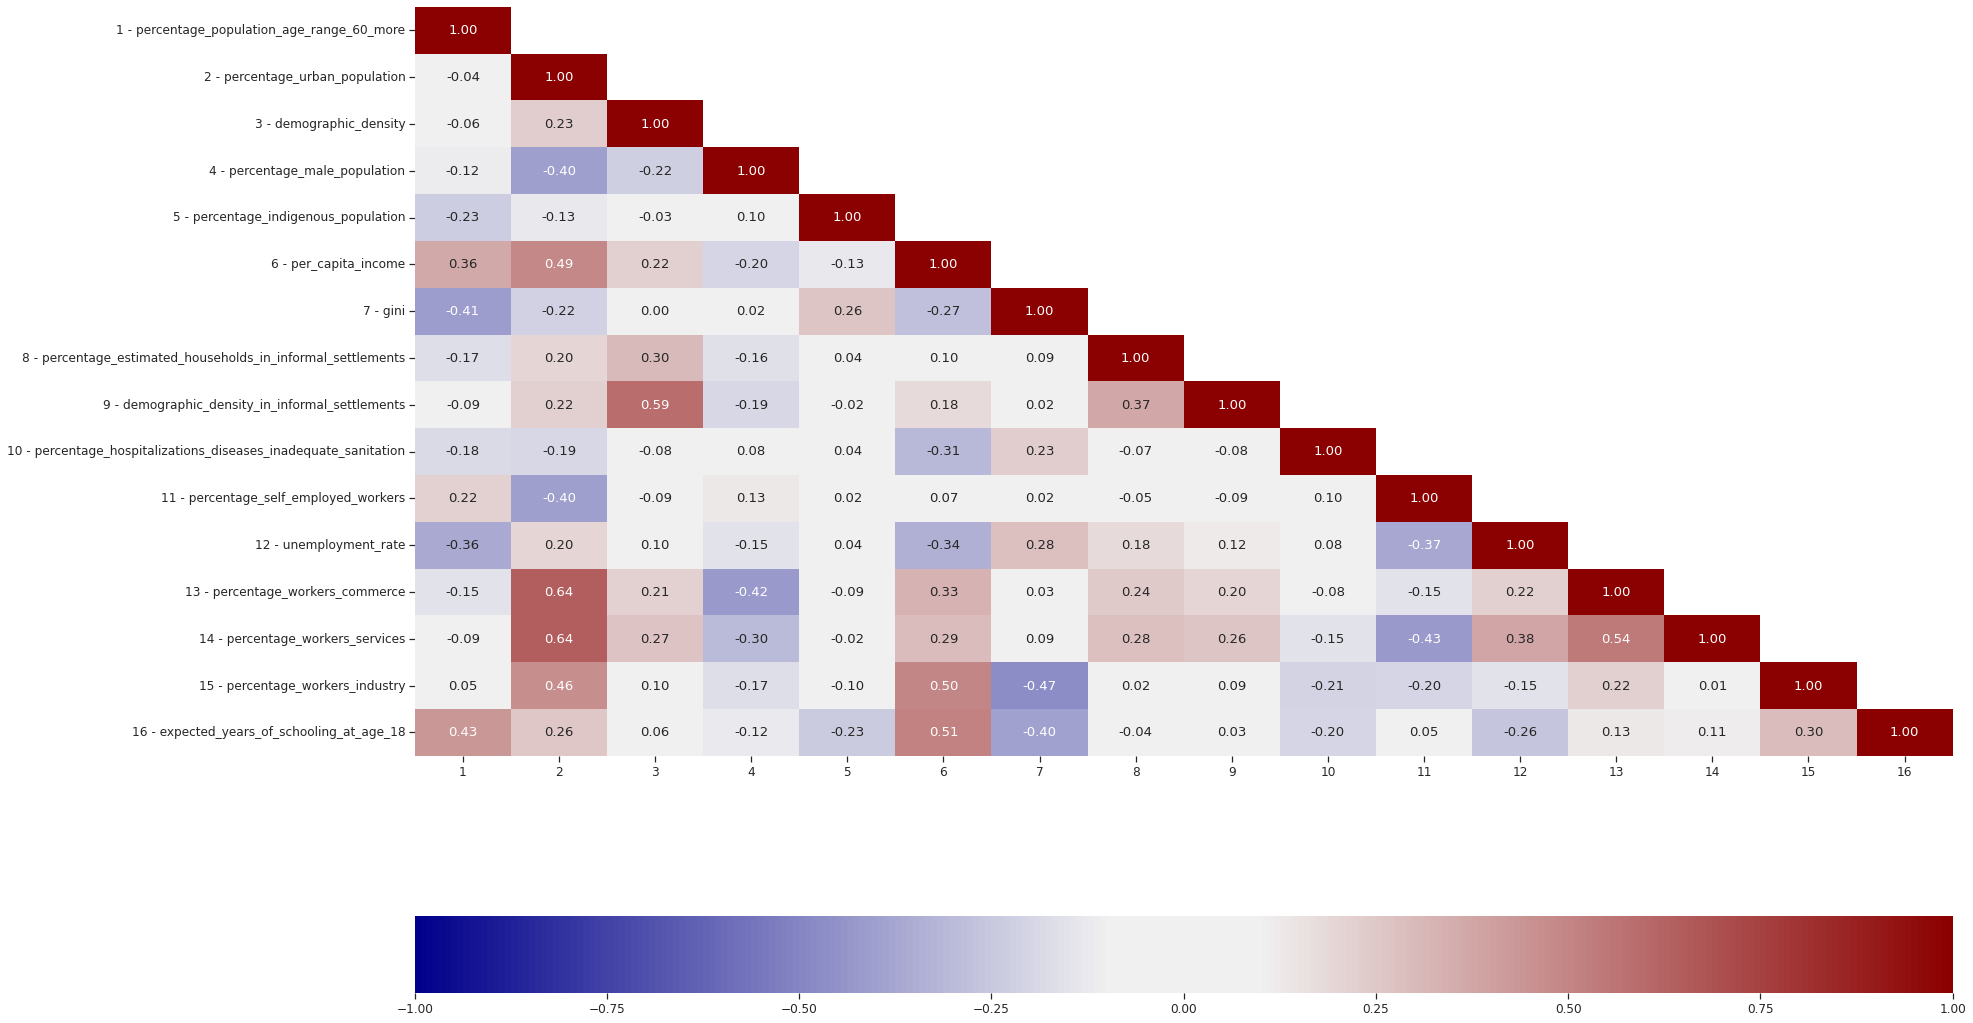

In [56]:
plot_pearson(df_without_collinearity_standardized)

In [57]:
calculate_vif(df_without_collinearity_standardized)

,Feature,VIF
0,percentage_population_age_range_60_more,1.920075
1,percentage_urban_population,3.551220
2,demographic_density,1.628679
3,percentage_male_population,1.396424
4,percentage_indigenous_population,1.143730
5,per_capita_income,3.044063
6,gini,1.881855
7,percentage_estimated_households_in_informal_se...,1.275315
8,demographic_density_in_informal_settlements,1.666247
9,percentage_hospitalizations_diseases_inadequat...,1.166382


## Dimensionality reduction

In [58]:
list_datasets = [df_standardized, df_normalized_min_max, df_normalized_l2, df_normalized_l1, df_normalized_max]
list_datasets_names = ['df_standardized', 'df_normalized_min_max', 'df_normalized_l2', 'df_normalized_l1', 'df_normalized_max']

### For all features

In [59]:
for dataset, dataset_name in zip(list_datasets, list_datasets_names):
    print('\n'+dataset_name)
    pca = PCA(n_components=2, whiten=False)
    pca_transformed = pca.fit_transform(dataset)
    print(sum(pca.explained_variance_ratio_))
    columns = ['principal_component_1', 'principal_component_2']
    df_pca = pd.DataFrame(pca_transformed, columns=columns, index=dataset.index)
    df_pca.to_csv('data/'+dataset_name+'_pca.csv', index=True)


df_standardized
0.49874540812401974

df_normalized_min_max
0.6356808964193248

df_normalized_l2
0.7855013527979104

df_normalized_l1
0.7913795442961575

df_normalized_max
0.7396085311124362


### For features without collinearity

In [60]:
features_without_collinearity = df_without_collinearity_standardized.columns

features_to_transform = [
    'percentage_estimated_households_in_informal_settlements', 
    'demographic_density_in_informal_settlements', 
    'percentage_hospitalizations_diseases_inadequate_sanitation',   
    'percentage_indigenous_population'
]
features_without_collinearity_transformed = [
    f'sqrt_{feature}' if feature in features_to_transform else feature 
    for feature in features_without_collinearity
]

features_to_transform = [
    'demographic_density',  
    'per_capita_income'
]
features_without_collinearity_transformed = [
    f'log_{feature}' if feature in features_to_transform else feature 
    for feature in features_without_collinearity_transformed
]

In [61]:
for dataset, dataset_name in zip(list_datasets, list_datasets_names):
    print('\n'+dataset_name)
    
    if dataset_name == 'df_standardized':
        list_features = features_without_collinearity
    else:
        list_features = features_without_collinearity_transformed
            
    pca = PCA(n_components=2, whiten=False)
    pca_transformed = pca.fit_transform(dataset[list_features])
    print(sum(pca.explained_variance_ratio_))
    columns = ['principal_component_1', 'principal_component_2']
    df_pca = pd.DataFrame(pca_transformed, columns=columns, index=dataset.index)
    df_pca.to_csv('data/'+dataset_name+'_without_collinearity_pca.csv', index=True)


df_standardized
0.4167695094358352

df_normalized_min_max
0.5332596296863806

df_normalized_l2
0.8078869163781431

df_normalized_l1
0.8137572465770866

df_normalized_max
0.7562294477676923


## Data overview

In [62]:
df_without_collinearity_standardized.describe().round(2)

,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,percentage_male_population,percentage_indigenous_population,per_capita_income,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
count,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00,5560.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.89,-2.71,-0.19,-2.97,-0.20,-1.63,-3.25,-0.23,-0.17,-0.68,-2.37,-1.76,-2.23,-2.70,-1.08,-4.67
25%,-0.67,-0.76,-0.18,-0.59,-0.19,-0.87,-0.67,-0.23,-0.17,-0.55,-0.67,-0.68,-0.75,-0.71,-0.71,-0.65
50%,-0.04,0.04,-0.15,-0.07,-0.18,-0.11,-0.07,-0.23,-0.17,-0.36,-0.21,-0.12,-0.12,-0.06,-0.35,0.01
75%,0.62,0.83,-0.10,0.49,-0.16,0.65,0.69,-0.23,-0.17,0.12,0.41,0.49,0.65,0.62,0.41,0.68
max,4.68,1.64,22.31,20.05,15.53,6.38,4.63,16.17,17.08,11.81,5.28,9.20,5.90,5.15,6.23,3.07


In [63]:
df_without_collinearity_standardized

,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,percentage_male_population,percentage_indigenous_population,per_capita_income,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
0,-0.628581,-0.296800,-0.189525,0.284206,0.371415,-0.067319,1.296166,-0.231671,-0.174949,0.318363,1.019514,-0.176079,0.728350,0.081283,-0.711839,-0.722666
1,-1.284191,0.947781,-0.157926,-0.280237,-0.179301,0.809268,0.539257,-0.163265,-0.174949,-0.200168,0.301861,-0.427022,1.683908,0.855398,-0.056770,-0.258143
2,0.383218,-0.960097,-0.187781,0.334943,-0.165356,-0.148902,0.236493,-0.231671,-0.174949,0.927261,0.841877,-1.004713,-0.933097,0.500970,-0.631077,0.570712
3,-0.891584,0.680480,-0.156198,-0.660760,0.120440,1.007299,1.144784,0.191127,-0.174949,-0.238896,0.028808,-0.121185,1.913151,0.744006,0.092415,0.251921
4,-0.595886,0.946765,-0.185047,-0.318289,-0.172215,0.345084,0.085111,-0.231671,-0.174949,0.709951,0.383066,-0.267568,0.796442,0.667495,-0.306908,0.689119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,-0.586877,0.420578,-0.168325,-0.235842,-0.172920,0.703811,-0.520416,-0.231671,-0.174949,1.103690,0.178023,-0.709332,0.562659,0.713627,0.460330,0.588928
5566,-1.228593,0.995862,-0.174581,0.816939,-0.149365,0.649230,-0.520416,-0.231671,-0.174949,-0.230290,-0.738583,-0.134255,0.022462,0.230930,0.749727,0.552495
5567,-1.185163,0.460540,-0.187915,1.298935,-0.164881,-0.480051,-0.217652,-0.231671,-0.174949,0.167753,-1.115173,0.571522,-0.731090,-0.160628,0.588203,0.935043
5568,-0.323161,-1.569425,-0.190146,1.463828,-0.181779,-0.376652,-0.369034,0.273356,-0.174949,-0.438993,-0.111271,-0.596931,-1.225893,-0.393538,-0.295691,-0.003111


In [64]:
df_base_original.drop(columns=['code_municipality_7']).describe()

,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,5.560000e+03,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,...,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000
mean,3.646769e+04,-16.440718,-46.223182,27.551123,28.763744,26.277372,17.426309,63.812480,116.038504,2.844906,...,24.686198,6.743603,56.505743,1.389835,35.568621,10.571038,32.457595,9.606112,11.810653,9.463415
std,2.066998e+05,8.277502,6.410673,4.848060,2.957805,2.657009,4.594961,22.035669,596.273211,0.321114,...,9.852446,3.825917,19.273486,1.563149,18.250913,4.406196,8.888366,8.915897,7.561540,1.097999
min,8.330000e+02,-33.687567,-72.916501,8.567018,17.264957,10.842848,4.159697,4.178855,0.150000,2.290000,...,1.360000,0.000000,10.890000,0.000000,0.060000,0.740000,8.500000,0.000000,0.900000,4.340000
25%,5.218000e+03,-22.832696,-50.866922,24.273074,26.957080,24.877145,14.333699,47.072463,11.340000,2.650000,...,18.080000,4.160000,40.257500,0.330000,21.840000,7.250000,26.127500,3.320000,5.570000,8.750000
50%,1.105950e+04,-18.083051,-46.505069,26.880118,28.870480,26.722121,17.262028,64.641604,24.265000,2.780000,...,22.665000,6.270000,57.175000,0.900000,36.465000,10.045000,31.890000,6.530000,9.385000,9.470000
75%,2.441375e+04,-8.489476,-41.400709,30.119537,30.566749,28.072239,20.272381,82.157733,53.495000,2.950000,...,28.692500,8.620000,73.682500,1.910000,49.295000,13.450000,38.002500,13.287500,17.972500,10.210000
max,1.145124e+07,4.585440,-32.435186,60.322886,54.732351,34.872029,38.914729,100.000000,13416.810000,5.860000,...,76.680000,41.930000,97.030000,16.400000,85.120000,36.570000,78.230000,65.110000,36.810000,12.830000


In [65]:
df_base_original[df_base_original['demographic_density_in_informal_settlements'] > 0]['demographic_density_in_informal_settlements'].describe()

count    323.000000
mean      80.101127
std       78.445592
min        0.504977
25%       24.339757
50%       56.869201
75%      104.163750
max      458.863079
Name: demographic_density_in_informal_settlements, dtype: float64

## Saving data

In [66]:
df_base_original.to_csv('data/output/df_base_without_missing_points.csv', index=True)

df_standardized.to_csv('data/output/df_standardized.csv', index=True)
df_transformed_features.to_csv('data/output/df_transformed_features.csv', index=True)
df_normalized_min_max.to_csv('data/output/df_normalized_min_max.csv', index=True)
df_normalized_l2.to_csv('data/output/df_normalized_l2.csv', index=True)
df_normalized_l1.to_csv('data/output/df_normalized_l1.csv', index=True)
df_normalized_max.to_csv('data/output/df_normalized_max.csv', index=True)

df_without_collinearity_standardized.to_csv('data/output/df_without_collinearity_standardized.csv', index=True)